# Loading Dataset and  Exploring features

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv(r'/content/Marketing_data.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
#feature for customer for oneoff purchases
df[df['ONEOFF_PURCHASES']==40761.250000	]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [6]:
#max cash advance
df[df['CASH_ADVANCE'] == 47137.211760	]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


#Visualization

<Axes: >

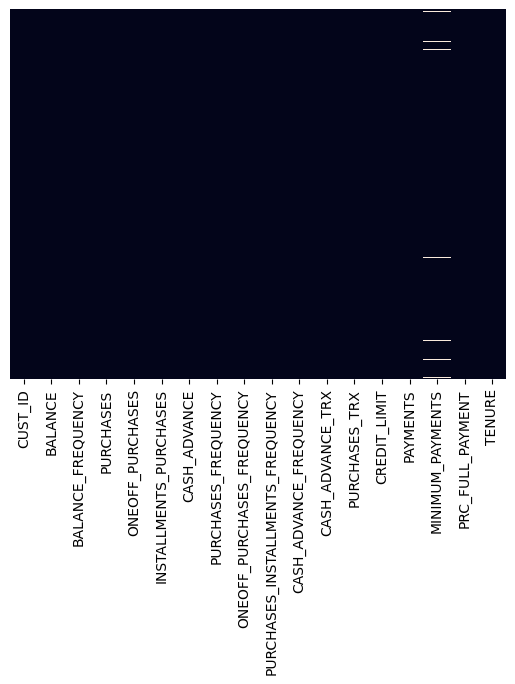

In [7]:
sns.heatmap(df.isna(),yticklabels=False , cbar = False)

In [3]:
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()


In [9]:
df.duplicated().sum()

np.int64(0)

In [4]:
df.drop('CUST_ID',axis = 1, inplace = True)

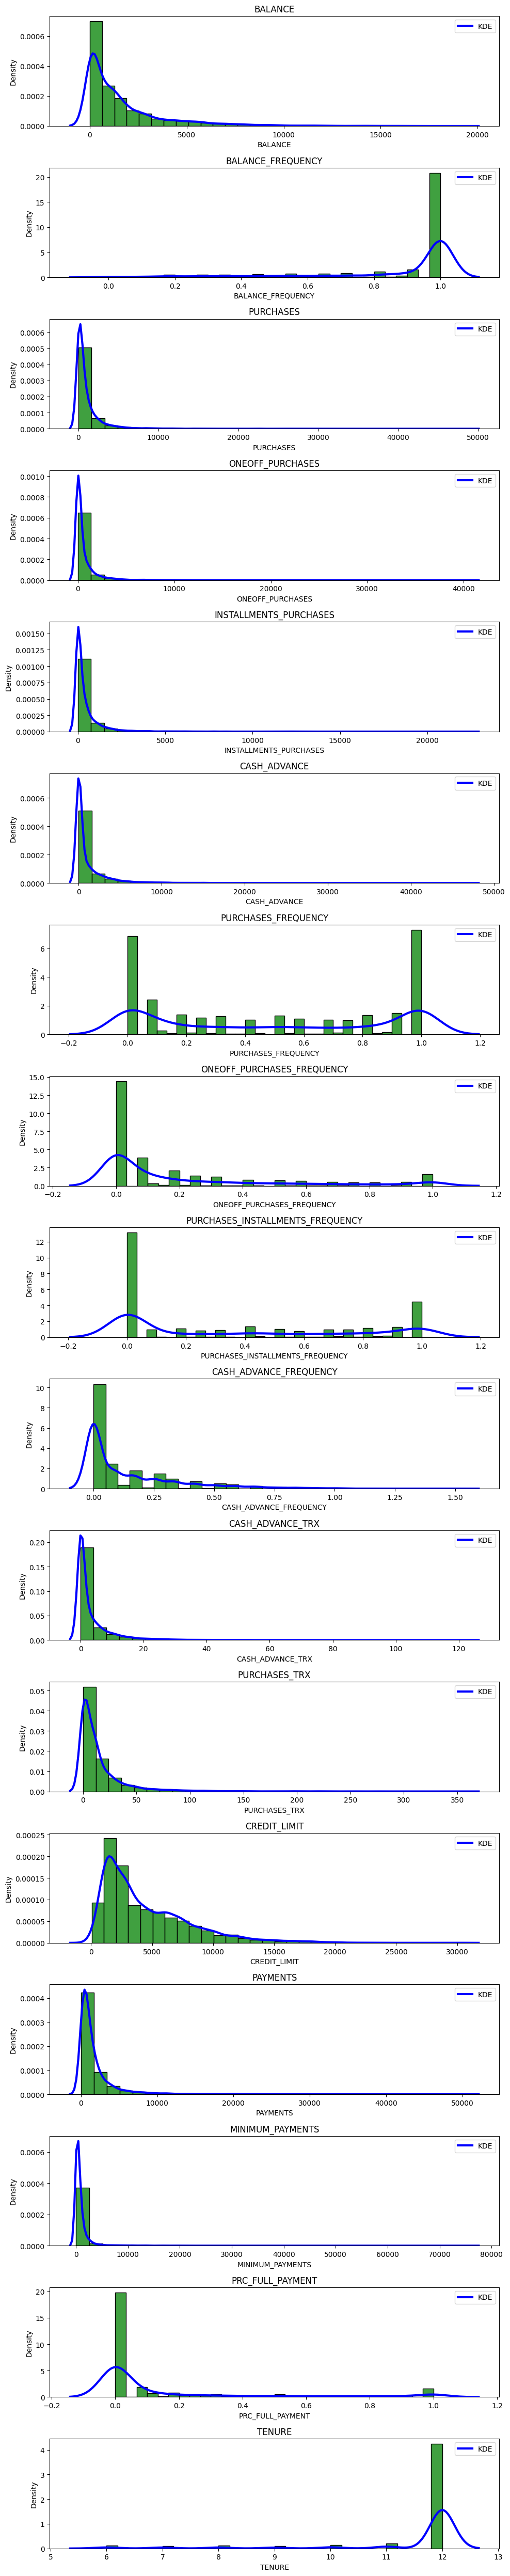

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 50))

for i in range(len(df.columns)):
    col_data = df[df.columns[i]].dropna()  # drop NaNs

    plt.subplot(17, 1, i + 1)

    # Histogram with density scale
    sns.histplot(col_data, color='g', bins=30, stat='density')

    # KDE
    sns.kdeplot(col_data, color='b', linewidth=3, label='KDE')

    plt.title(df.columns[i])
    plt.legend()

plt.tight_layout()


In [6]:
corelation = df.corr()

<Axes: >

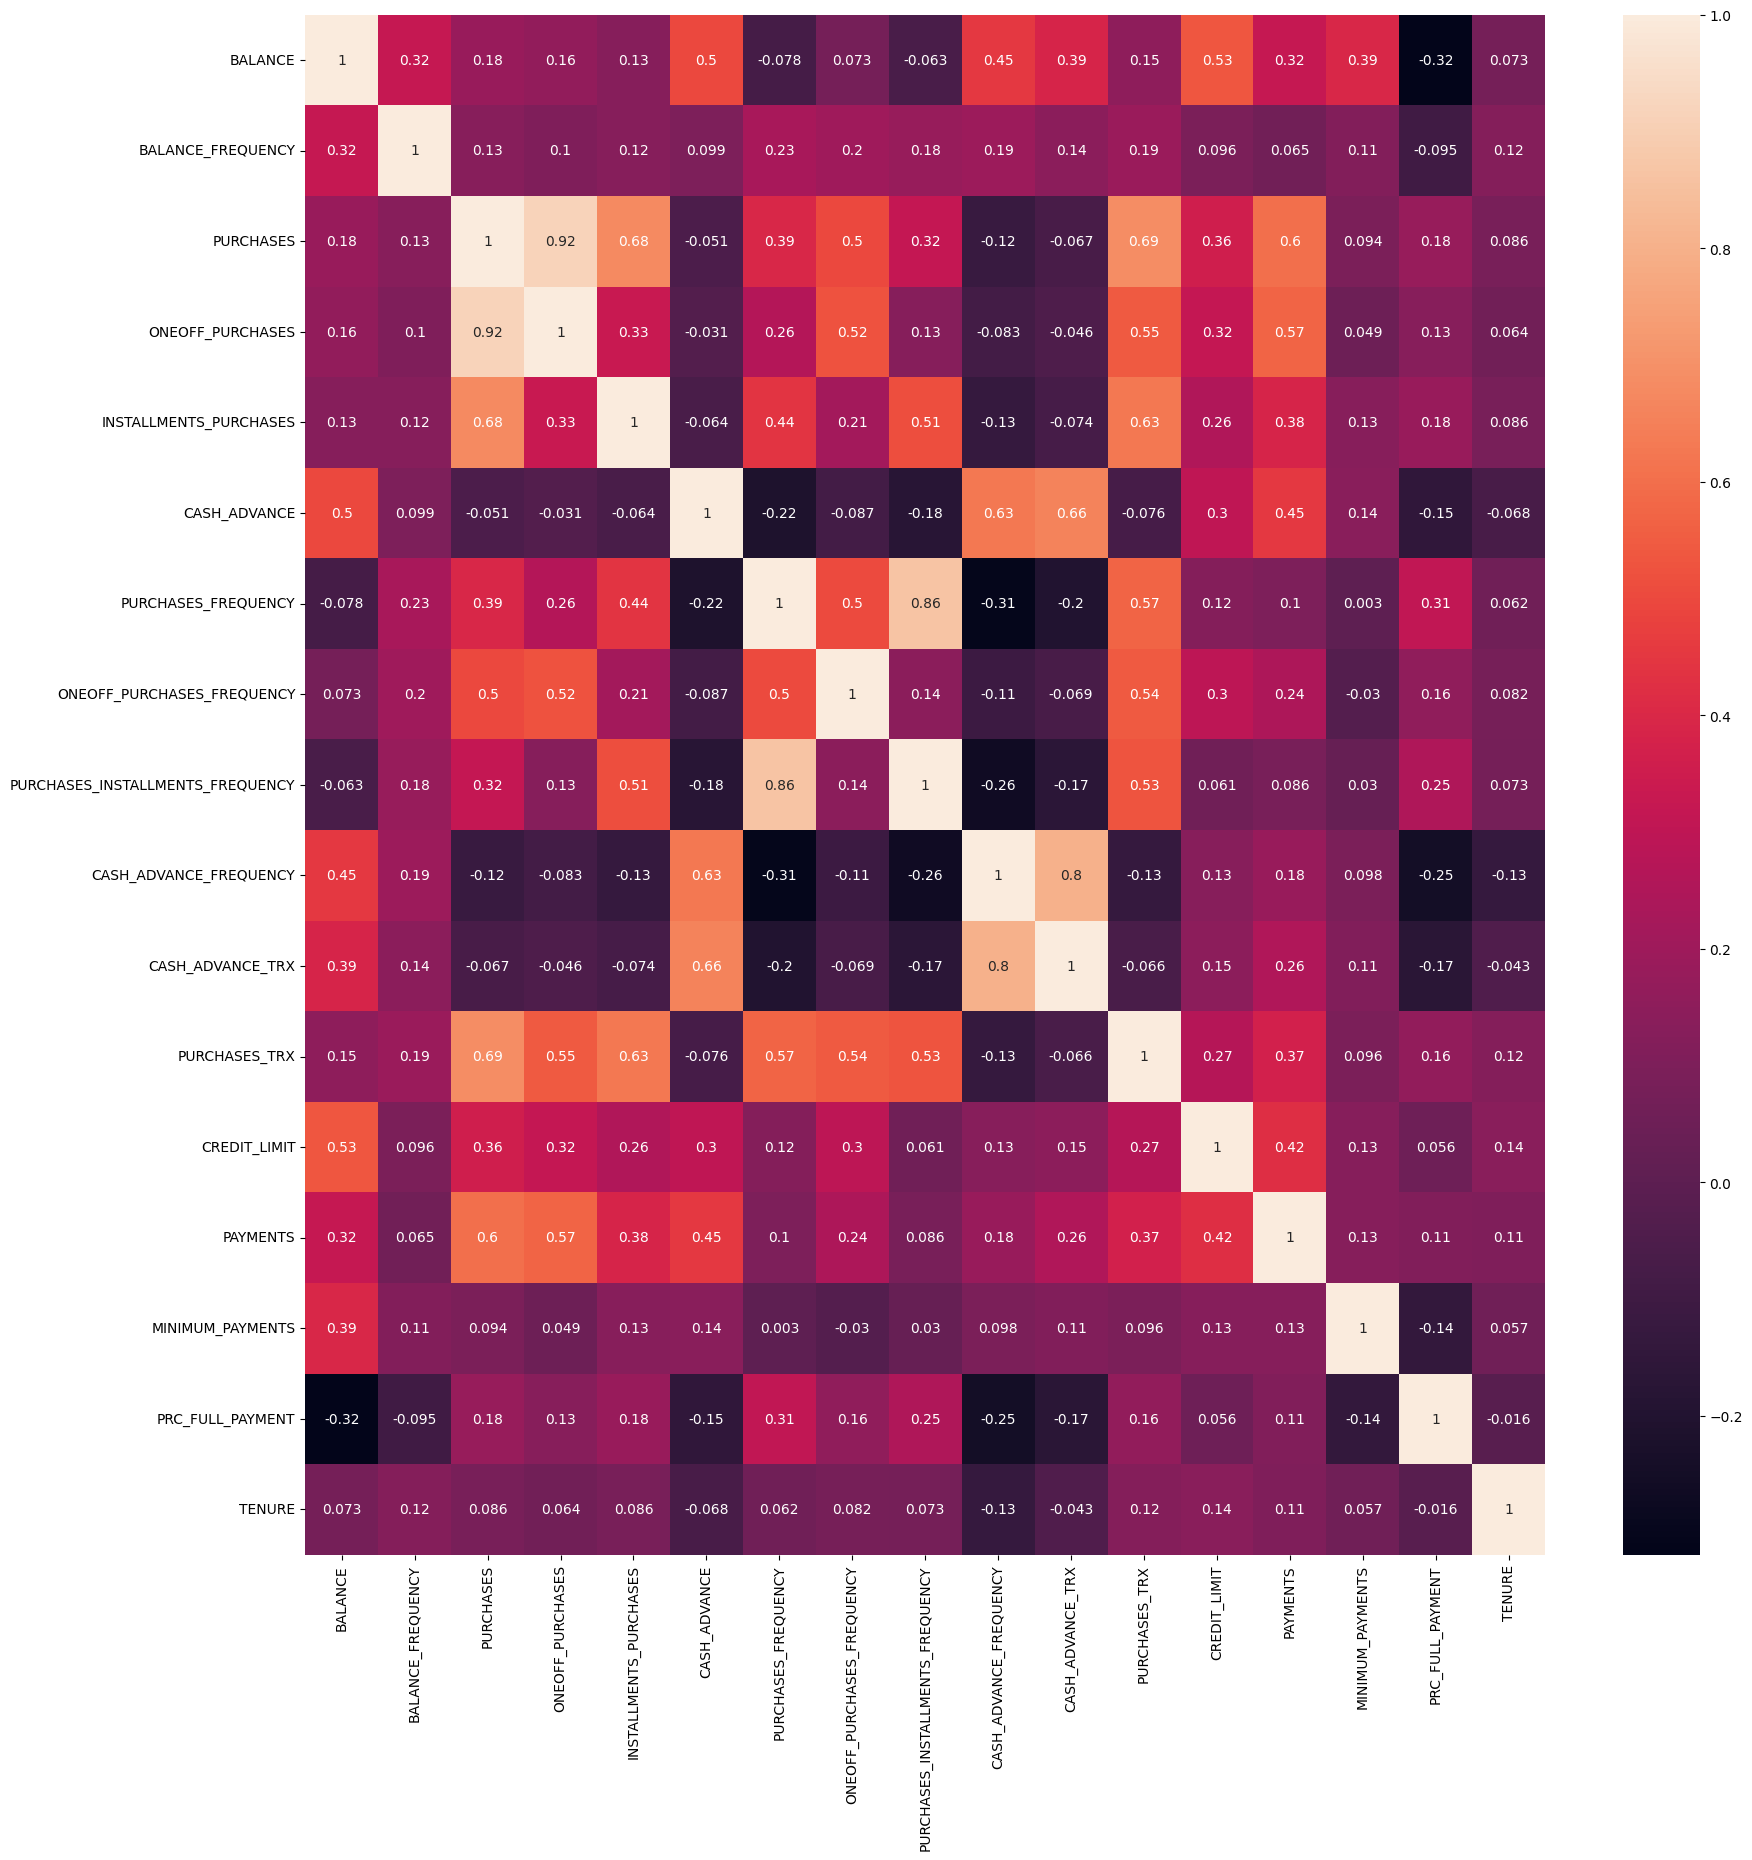

In [7]:
 f,ax = plt.subplots(figsize = (20, 20))
sns.heatmap(corelation, annot = True)

# K-Means

In [8]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(df)

In [9]:
creditcard_df_scaled.shape

(8950, 17)

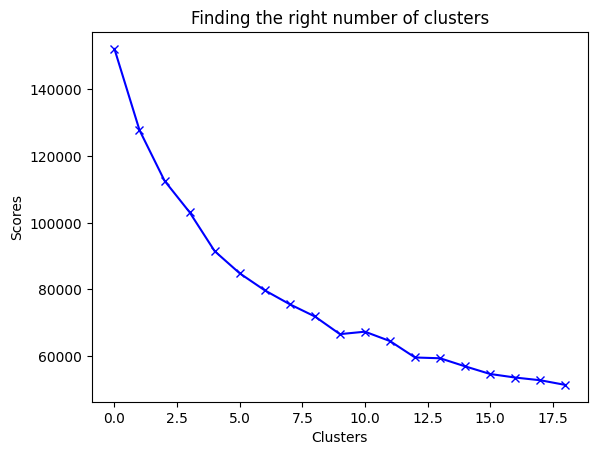

In [31]:
score_1 = []
range_values = range(1,20)
for i in range_values:
  kmeans=KMeans(n_clusters= i)
  kmeans.fit_transform(creditcard_df_scaled)
  score_1.append(kmeans.inertia_)
plt.plot(score_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()


In [12]:
kmeans = KMeans(9)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [13]:

cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.801274,0.475501,2.167202,1.767772,1.876582,-0.182310,1.161613,1.739976,1.107942,-0.283682,-0.202891,2.588093,1.190403,1.179640,0.348998,0.227365,0.323532
1,-0.113813,0.394843,-0.353475,-0.234202,-0.405374,-0.182475,-0.847634,-0.379238,-0.766804,-0.015288,-0.116347,-0.482217,-0.392688,-0.283647,-0.080770,-0.447302,0.278471
2,1.759493,0.332092,0.017537,0.021725,0.001227,4.085693,-0.207602,0.049982,-0.172244,2.552517,3.764168,-0.000885,1.300934,2.736488,0.552977,-0.183869,0.032526
3,-0.688619,0.142981,0.157090,0.024777,0.325446,-0.448720,0.920663,0.384468,0.736019,-0.642076,-0.458107,0.250207,0.153615,-0.097539,-0.290889,2.171127,0.190341
4,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409
5,1.417053,0.413868,-0.299945,-0.211924,-0.319909,1.145438,-0.630390,-0.299790,-0.558682,1.489228,1.158918,-0.376551,0.757565,0.205672,0.540162,-0.453788,0.116445
6,-0.167452,0.396329,0.058590,-0.038058,0.208375,-0.330470,0.964476,0.274330,0.873718,-0.401722,-0.320231,0.275530,-0.166079,-0.148208,0.004090,-0.331310,0.287204
7,-0.338171,-0.349273,-0.282924,-0.199389,-0.302273,0.065300,-0.190786,-0.264296,-0.232952,0.300500,-0.005637,-0.385431,-0.568172,-0.391005,-0.207102,-0.030832,-3.203830
8,-0.700237,-2.217120,-0.322022,-0.242217,-0.316280,-0.313550,-0.577538,-0.458778,-0.449085,-0.510918,-0.370569,-0.427018,-0.190503,-0.206788,-0.253263,0.123421,0.199351


In [14]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3232.258376,0.989913,5633.466214,3526.576272,2108.037170,596.558077,0.956562,0.721526,0.804762,0.078376,1.864245,79.040153,8825.621415,5148.086473,1677.530900,0.220215,11.950287
1,1327.582859,0.970805,248.000517,203.710263,44.493407,596.212508,0.150154,0.089324,0.059690,0.132085,2.454844,2.723727,3065.688287,912.014767,675.974833,0.022887,11.889984
2,5226.710690,0.955940,1040.673386,628.496243,412.177143,9546.760311,0.407030,0.217368,0.295983,0.645929,28.936508,14.687831,9227.777778,9655.008286,2152.896775,0.099936,11.560847
3,131.171655,0.911142,1338.830624,633.561828,705.364473,37.884078,0.859857,0.317152,0.656950,0.006658,0.122581,20.929032,5053.365103,1450.777147,186.302243,0.788732,11.772043
4,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667
5,4513.951848,0.975312,362.366877,240.687626,121.778152,3380.907213,0.237345,0.113024,0.142403,0.433154,11.157588,5.350195,7250.782632,2328.543524,2123.030441,0.020989,11.673152
6,1215.937547,0.971157,1128.383241,529.268487,599.498668,285.859592,0.877441,0.284296,0.711675,0.054756,1.063484,21.558473,3890.187556,1304.096097,873.737142,0.056812,11.901671
7,860.600219,0.794531,398.733625,261.493091,137.725971,1115.809167,0.413779,0.123613,0.271856,0.195277,3.210356,5.129450,2427.207847,601.222674,381.564656,0.144697,7.229773
8,106.990274,0.352055,315.198979,190.407435,125.059657,321.341837,0.258557,0.065595,0.185960,0.032904,0.719964,4.095754,3801.322895,1134.513151,273.988216,0.189813,11.784101


In [15]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans


array([1, 5, 4, ..., 8, 1, 6], dtype=int32)

In [16]:

creditcard_df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


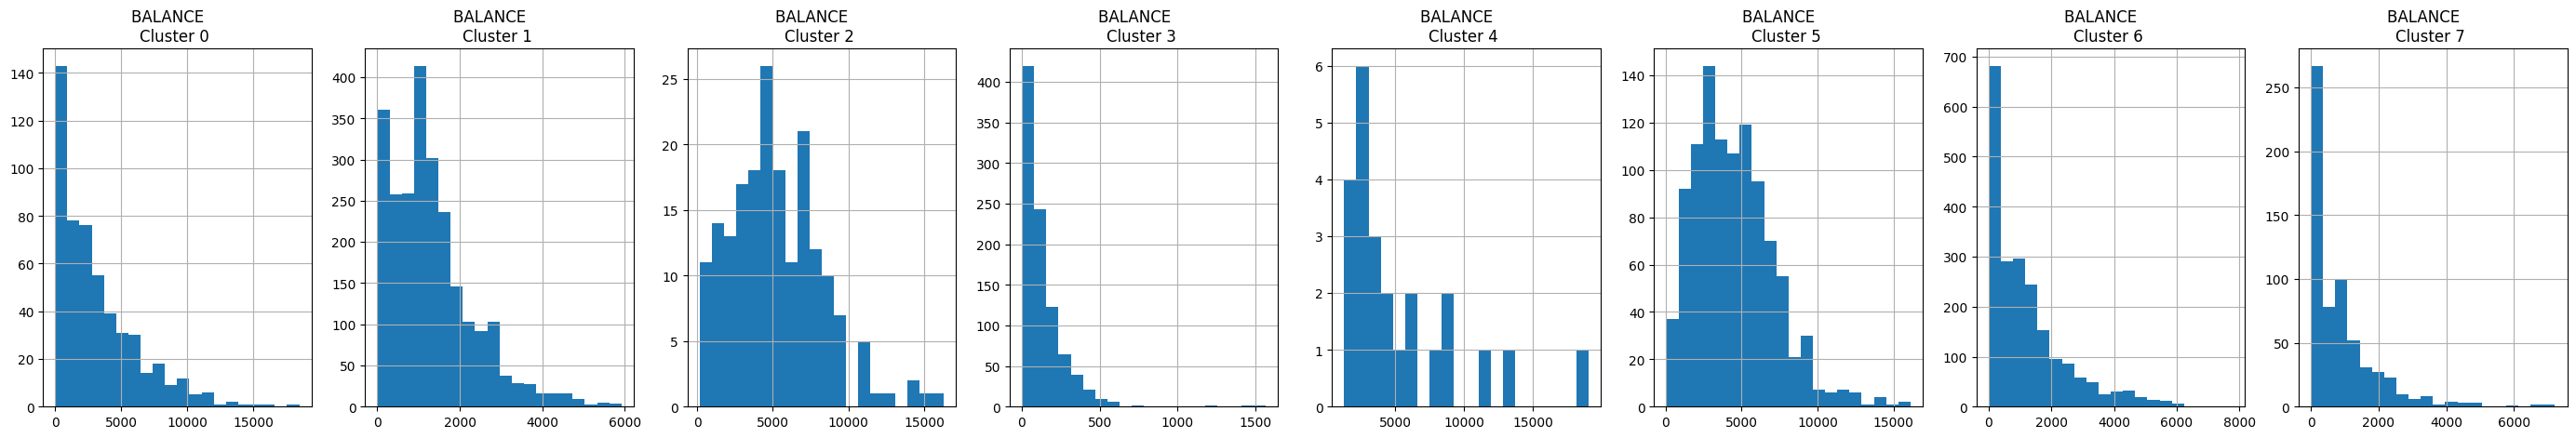

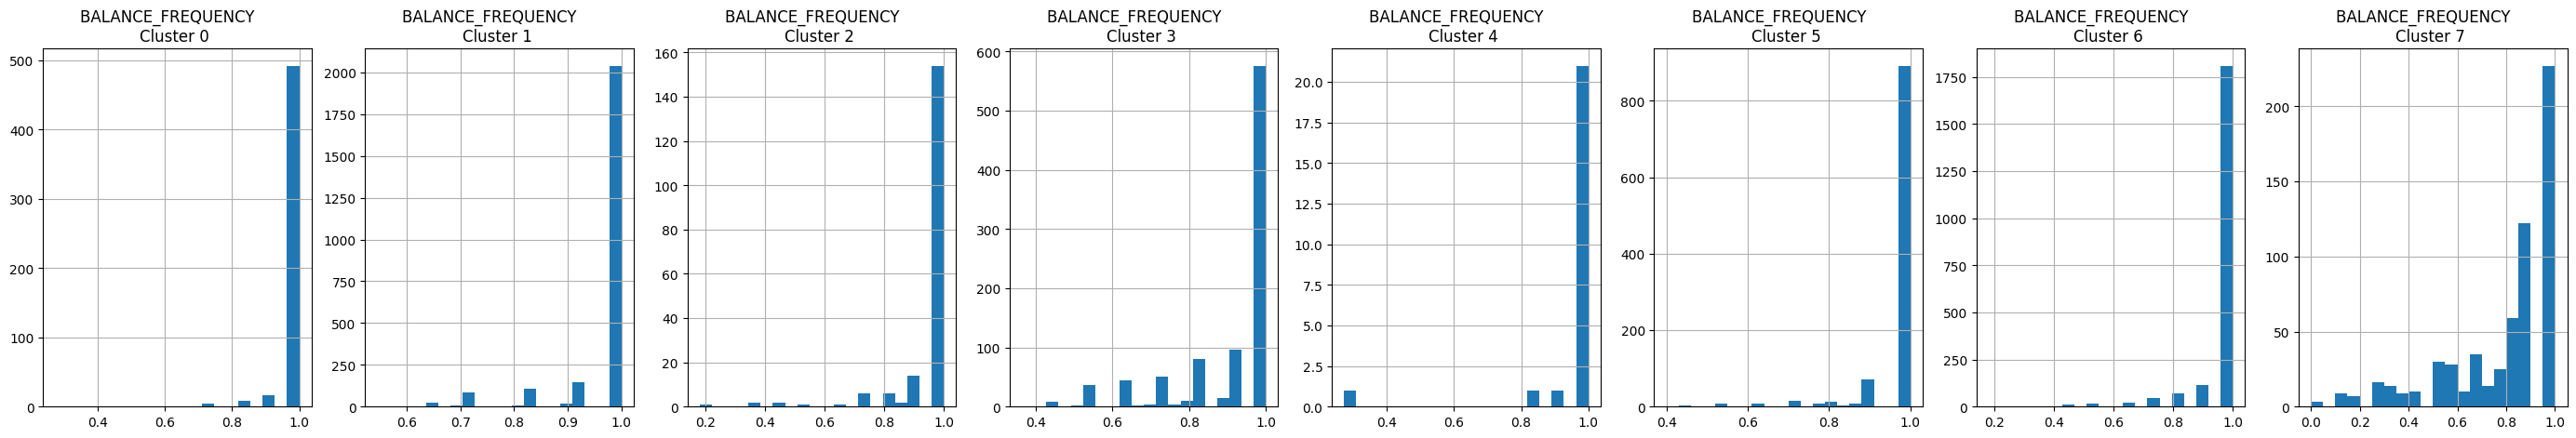

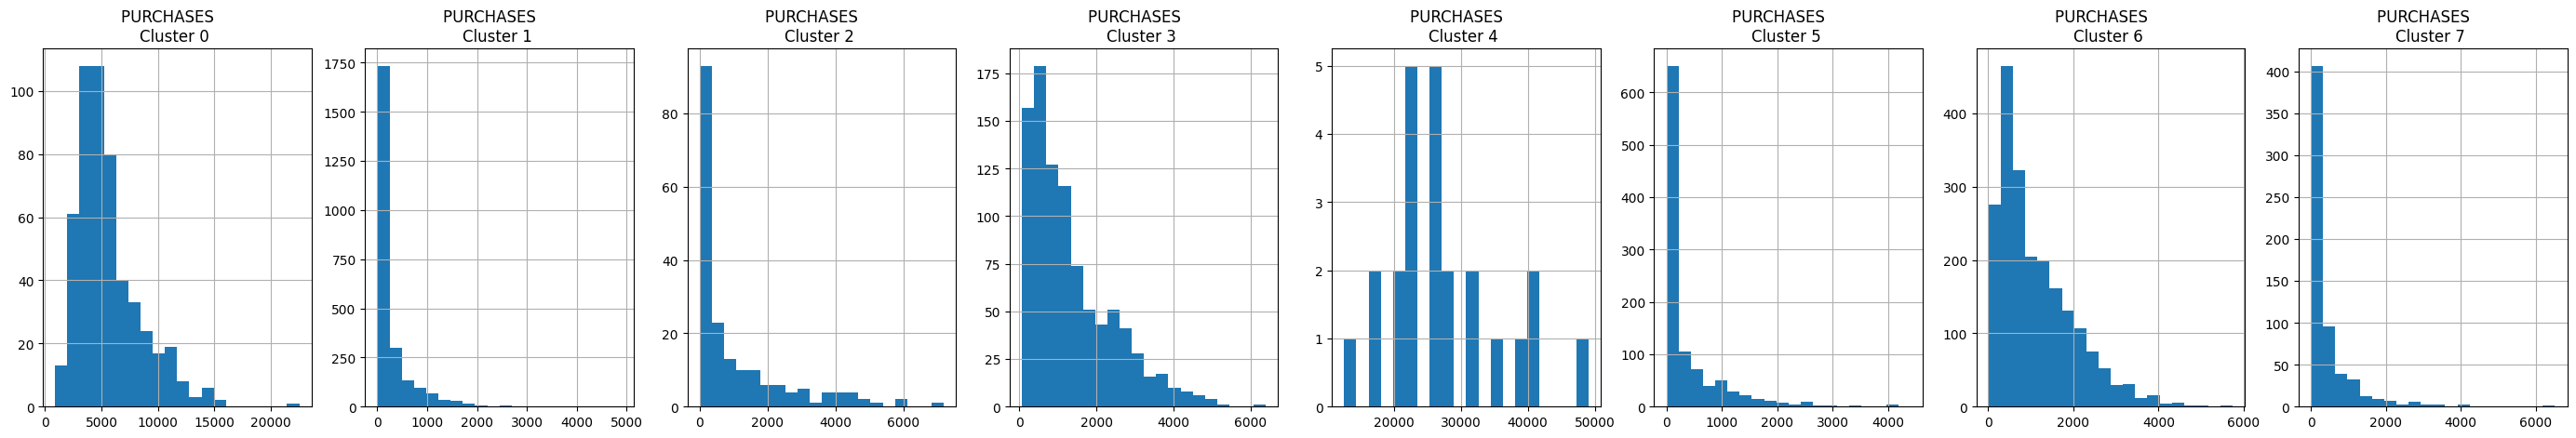

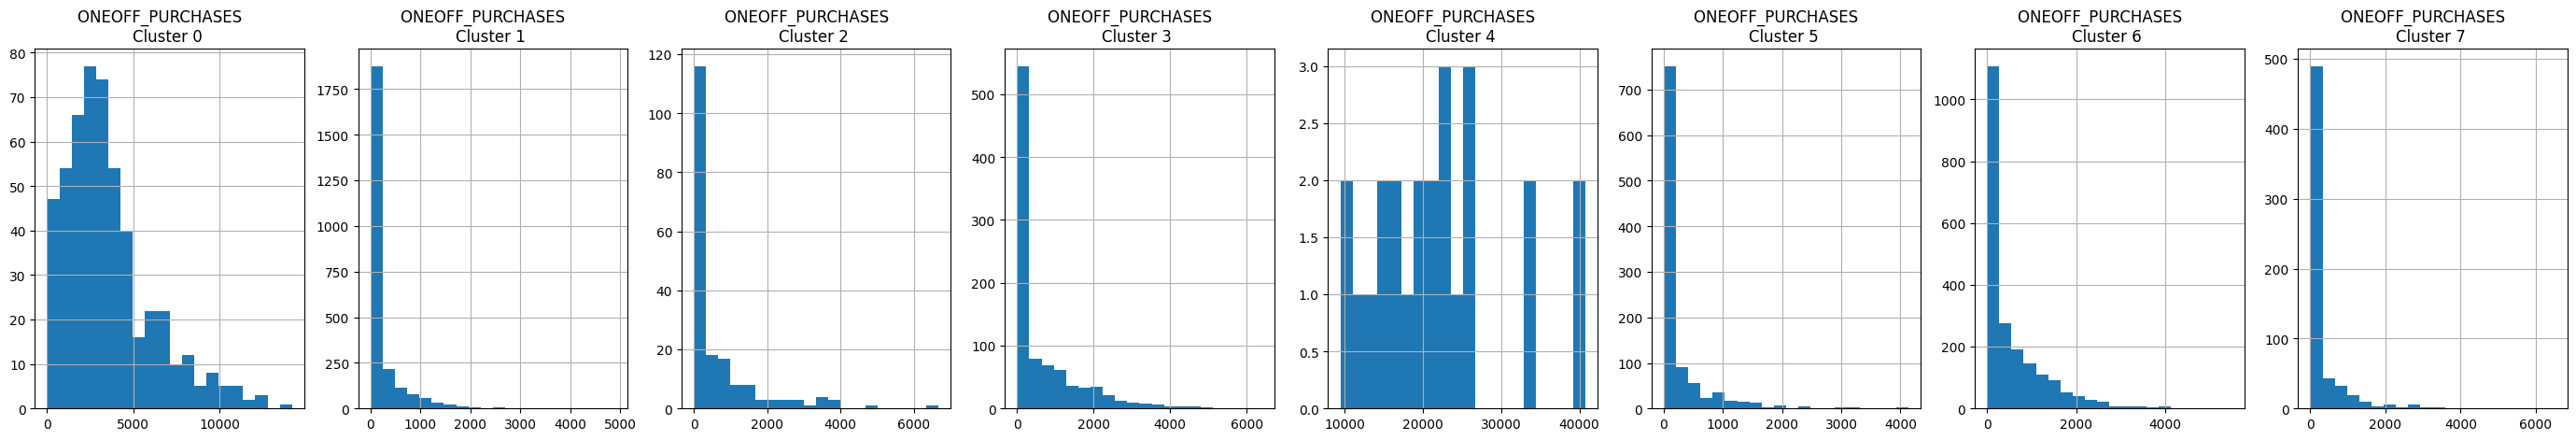

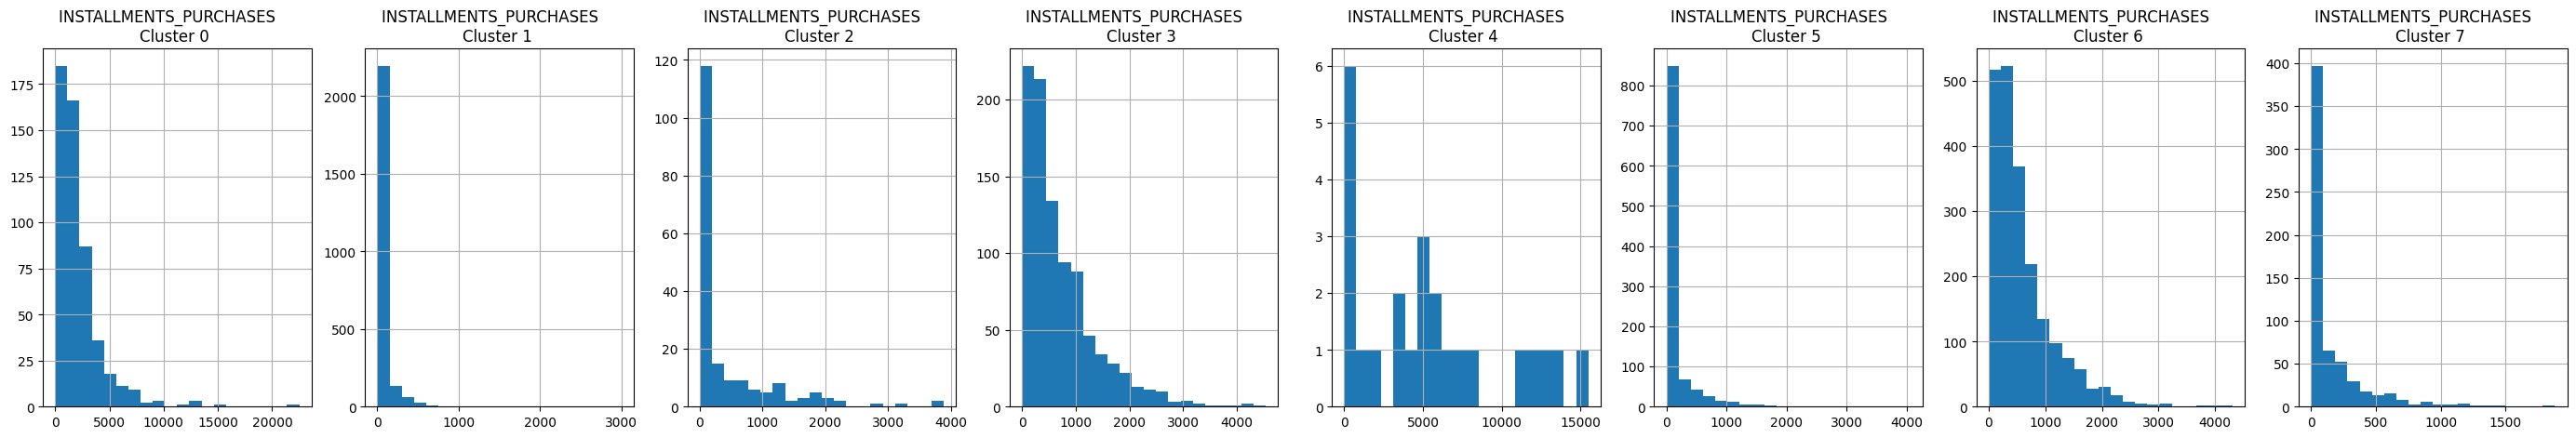

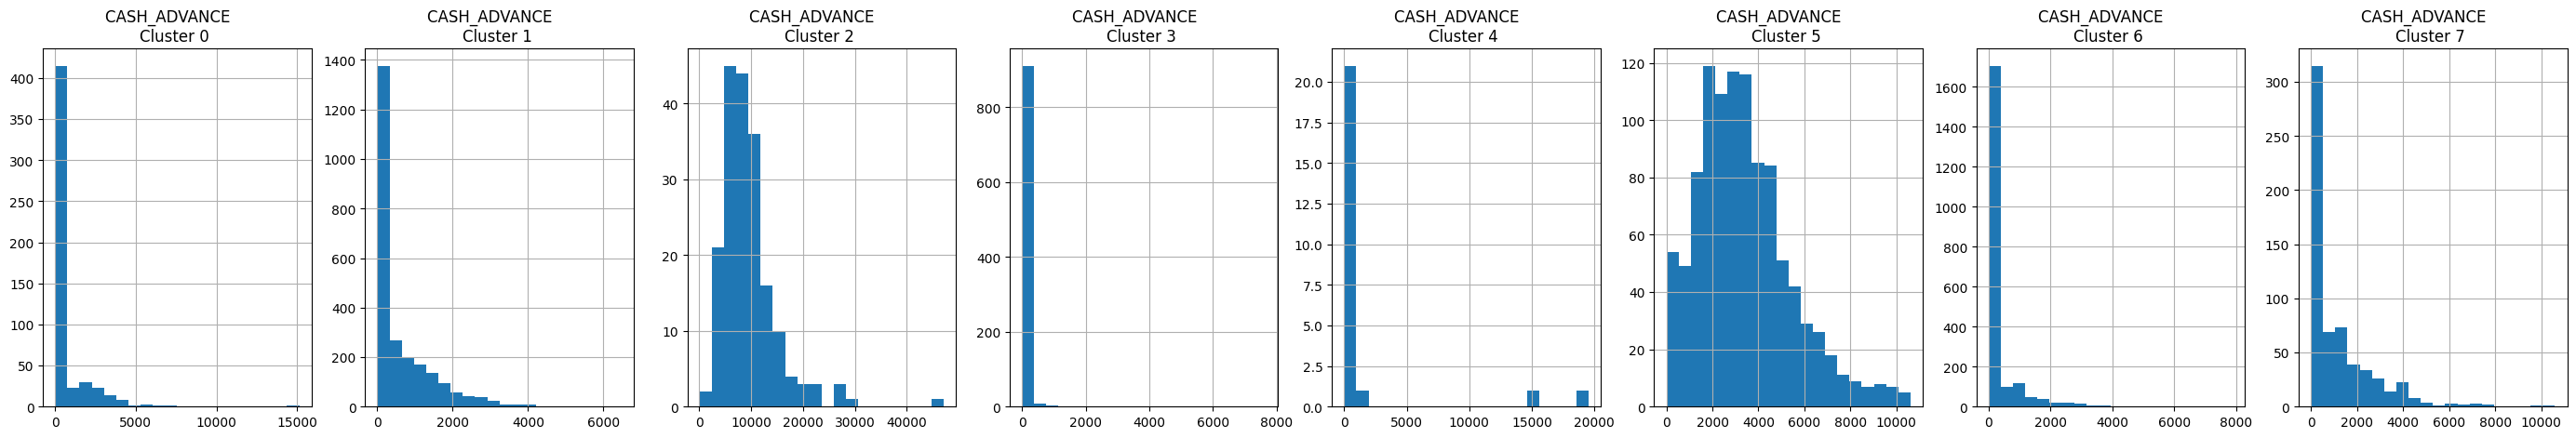

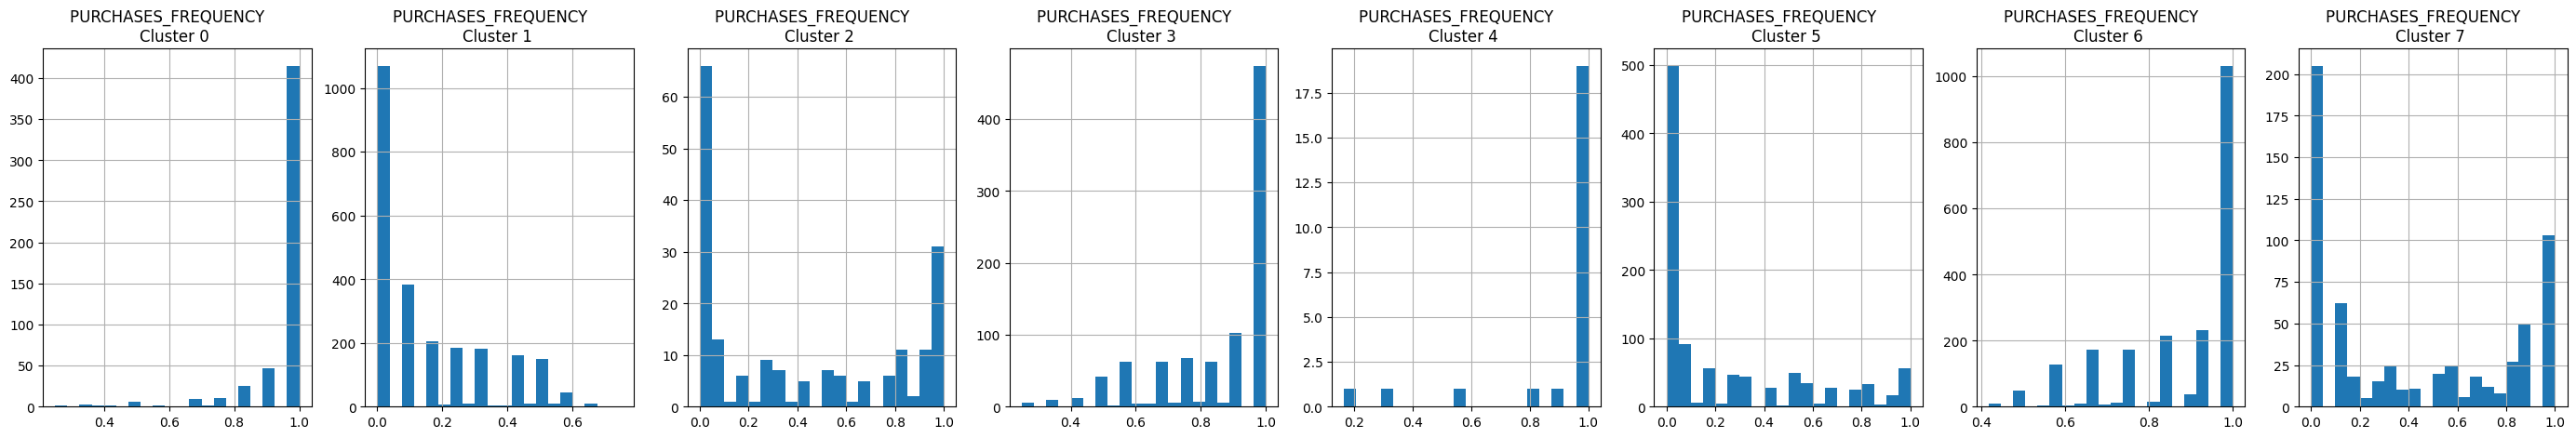

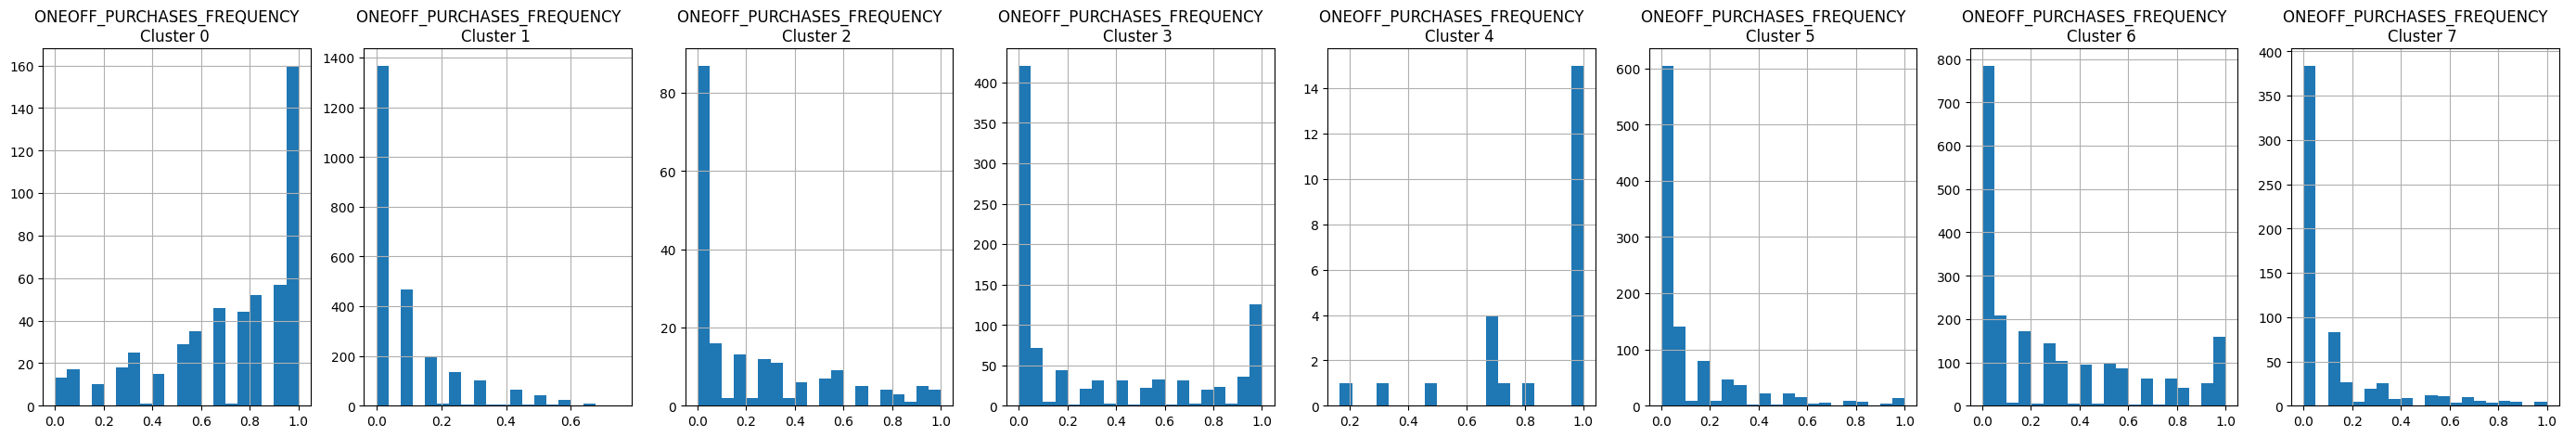

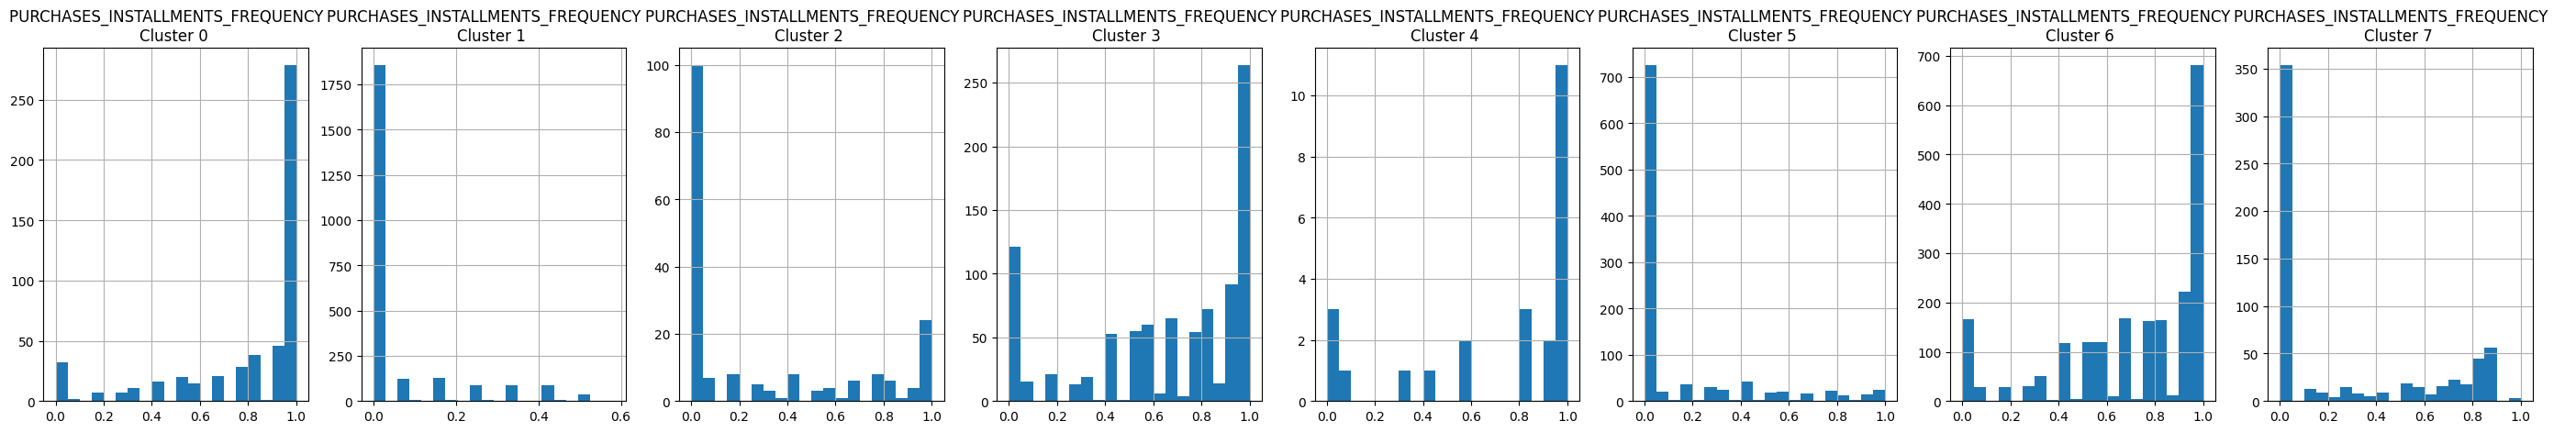

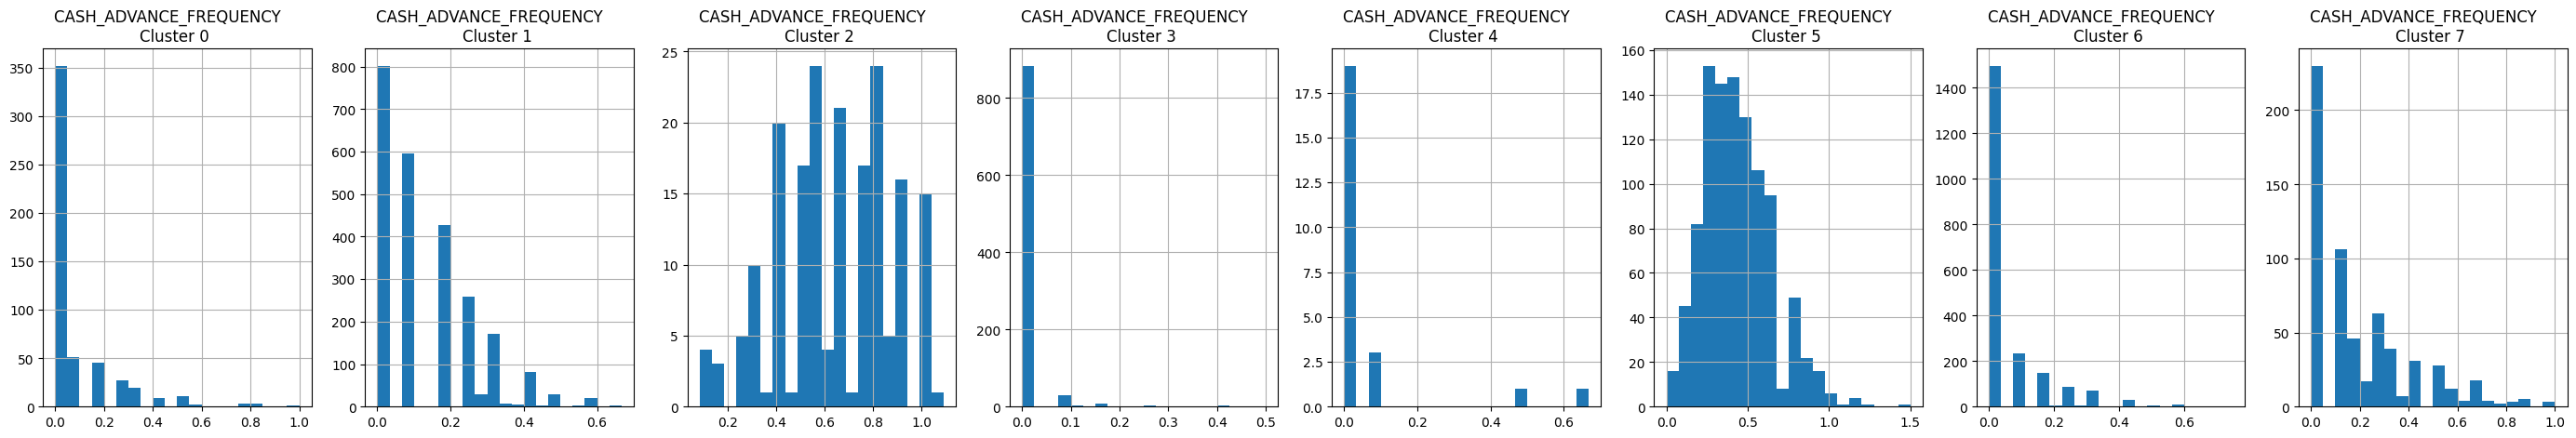

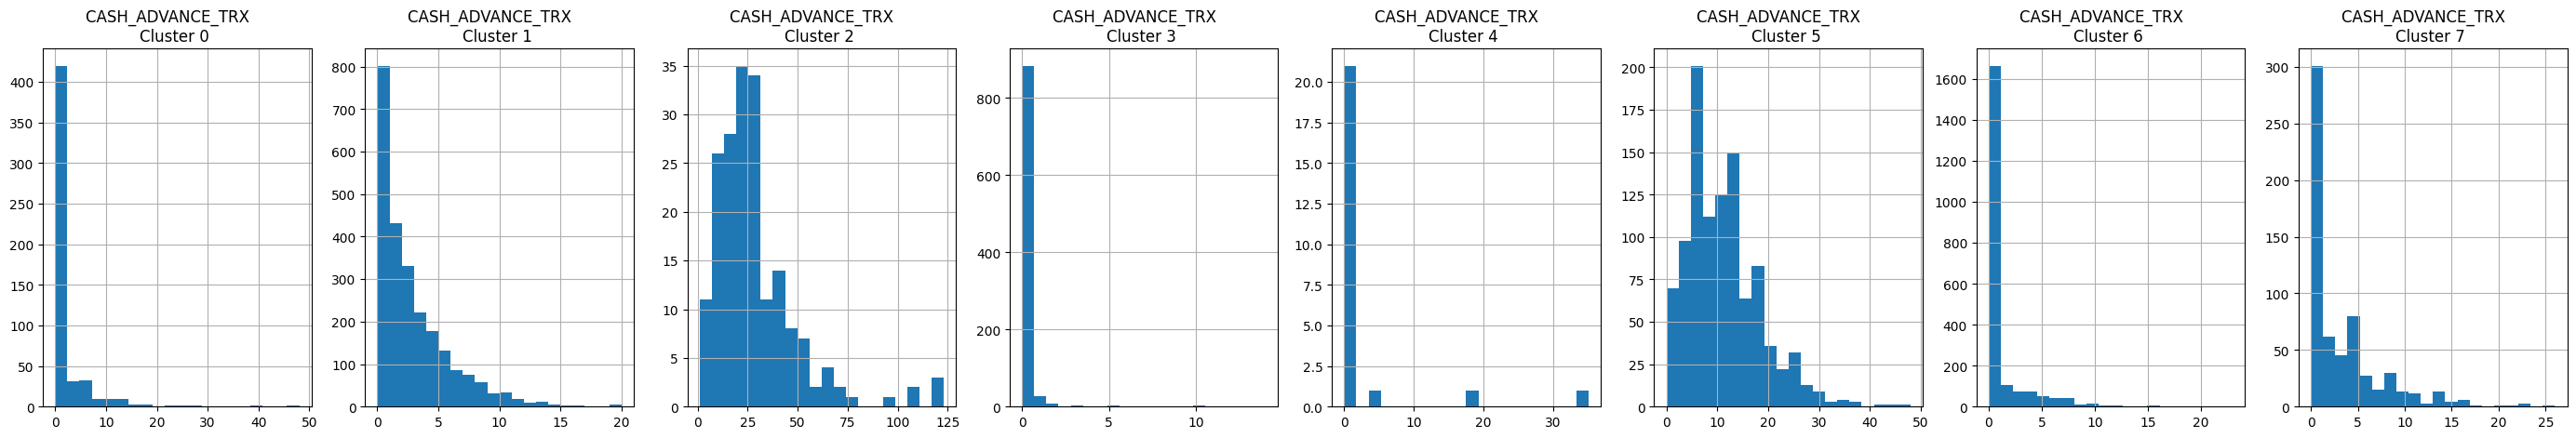

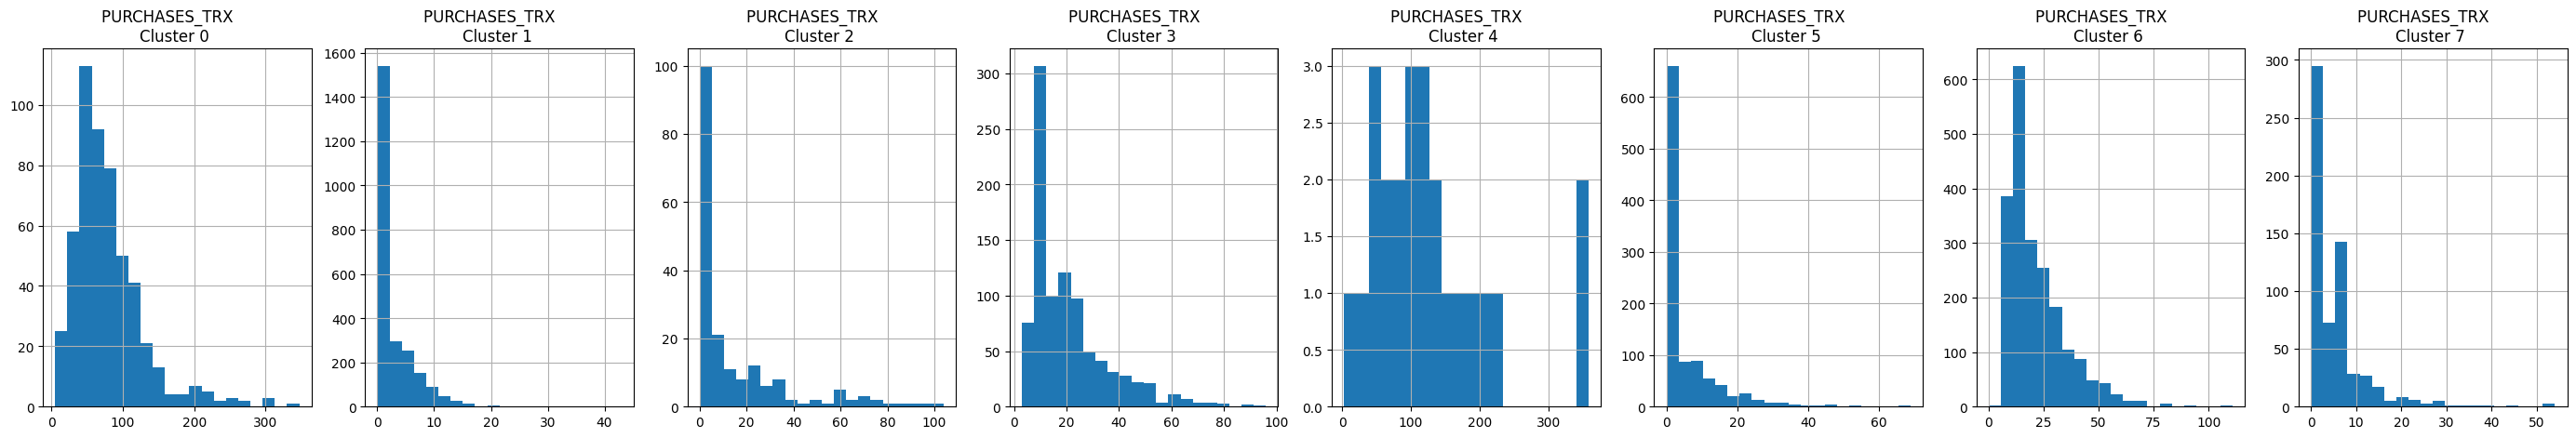

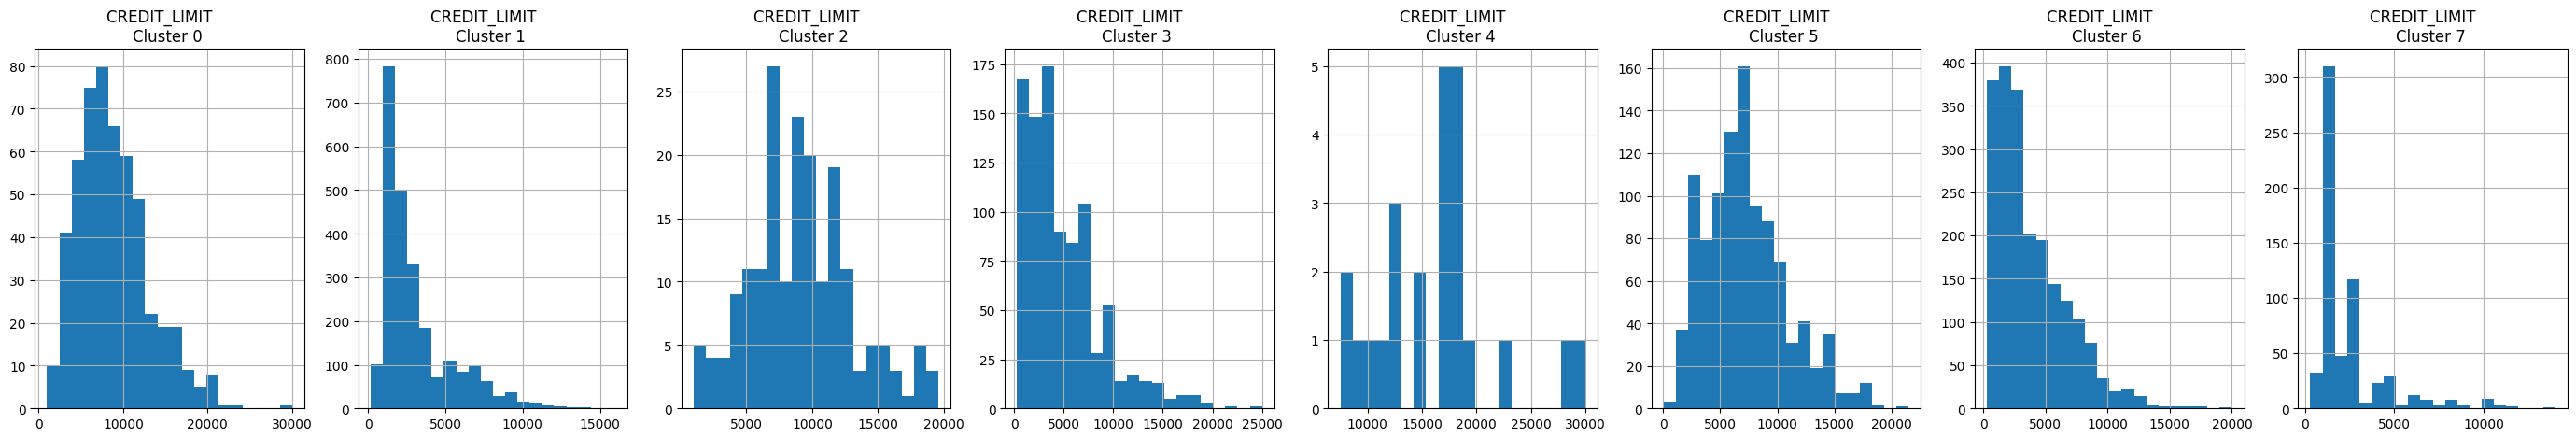

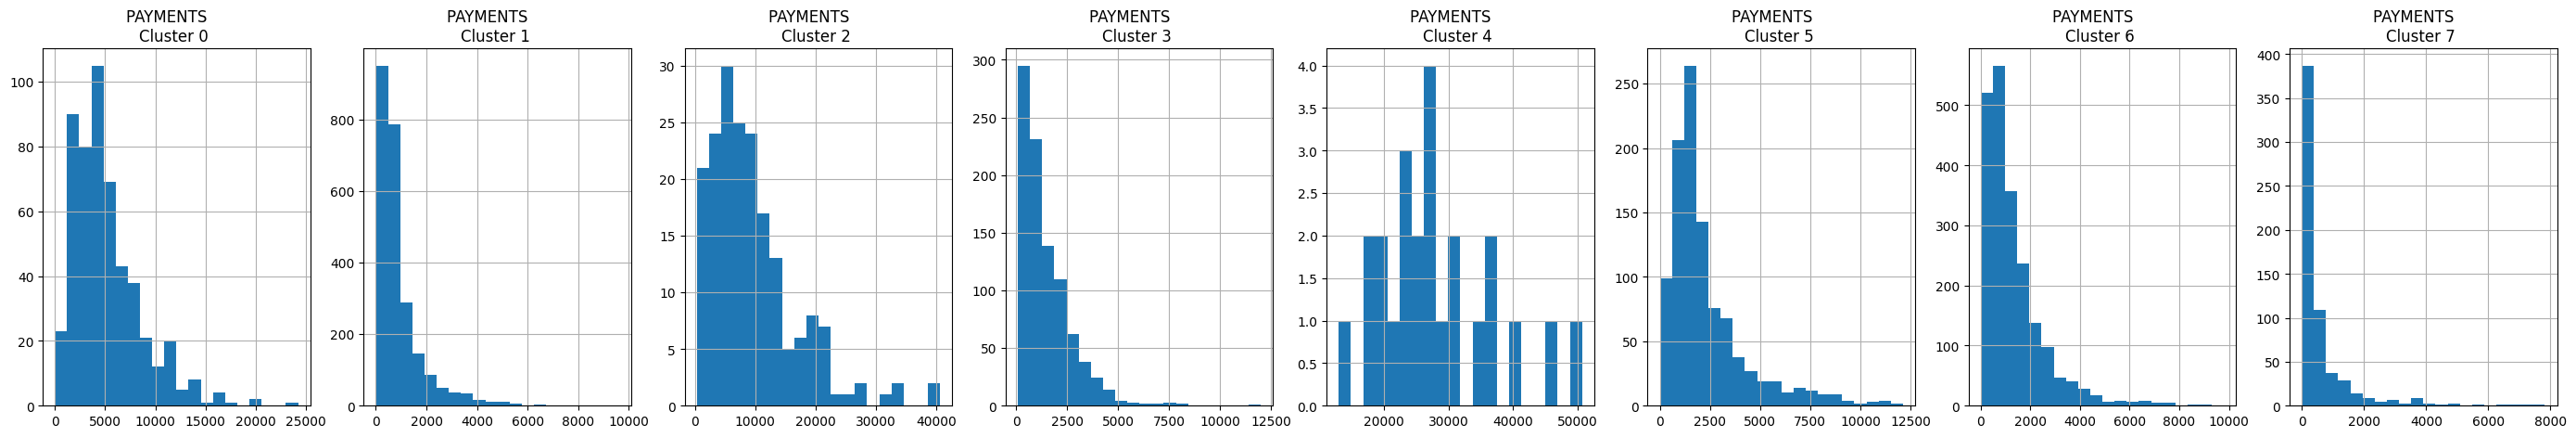

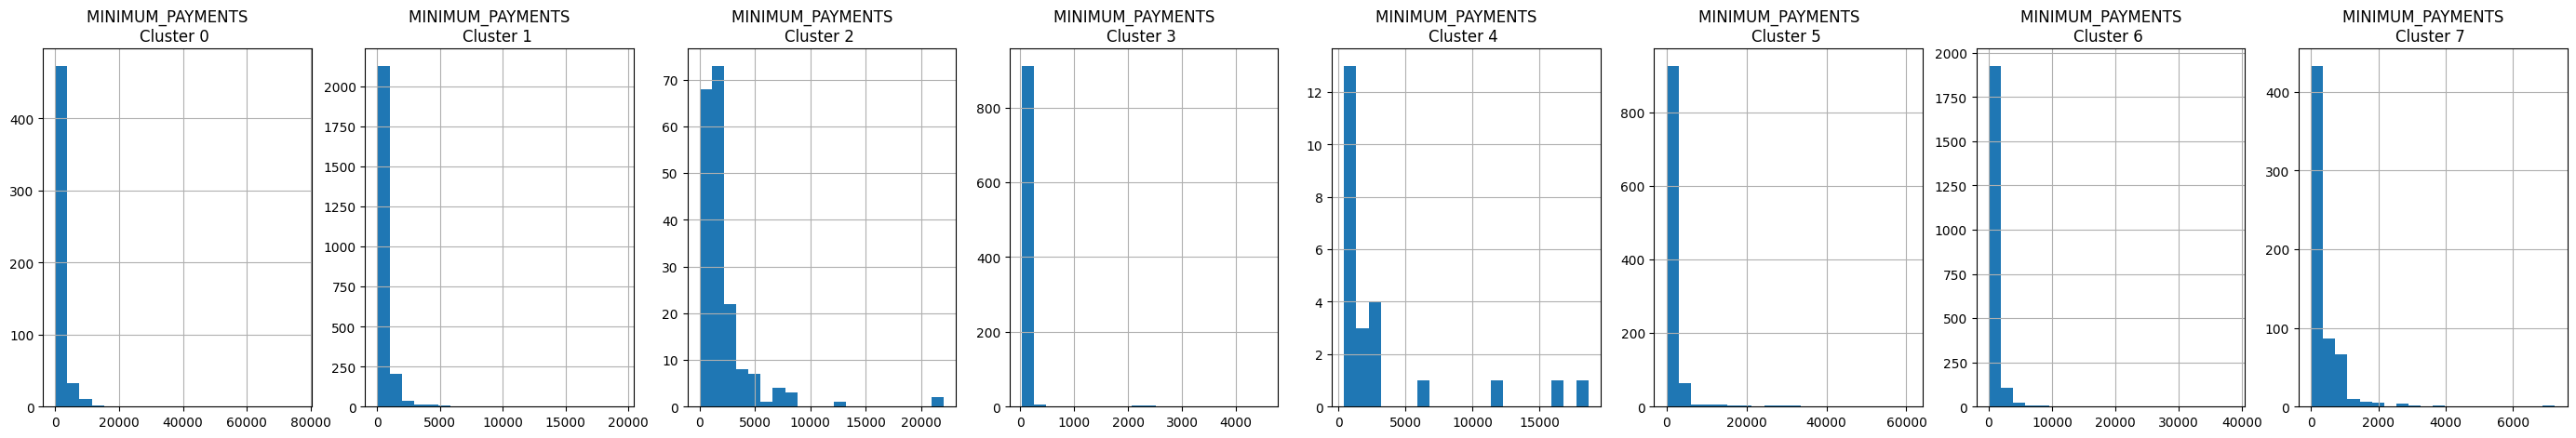

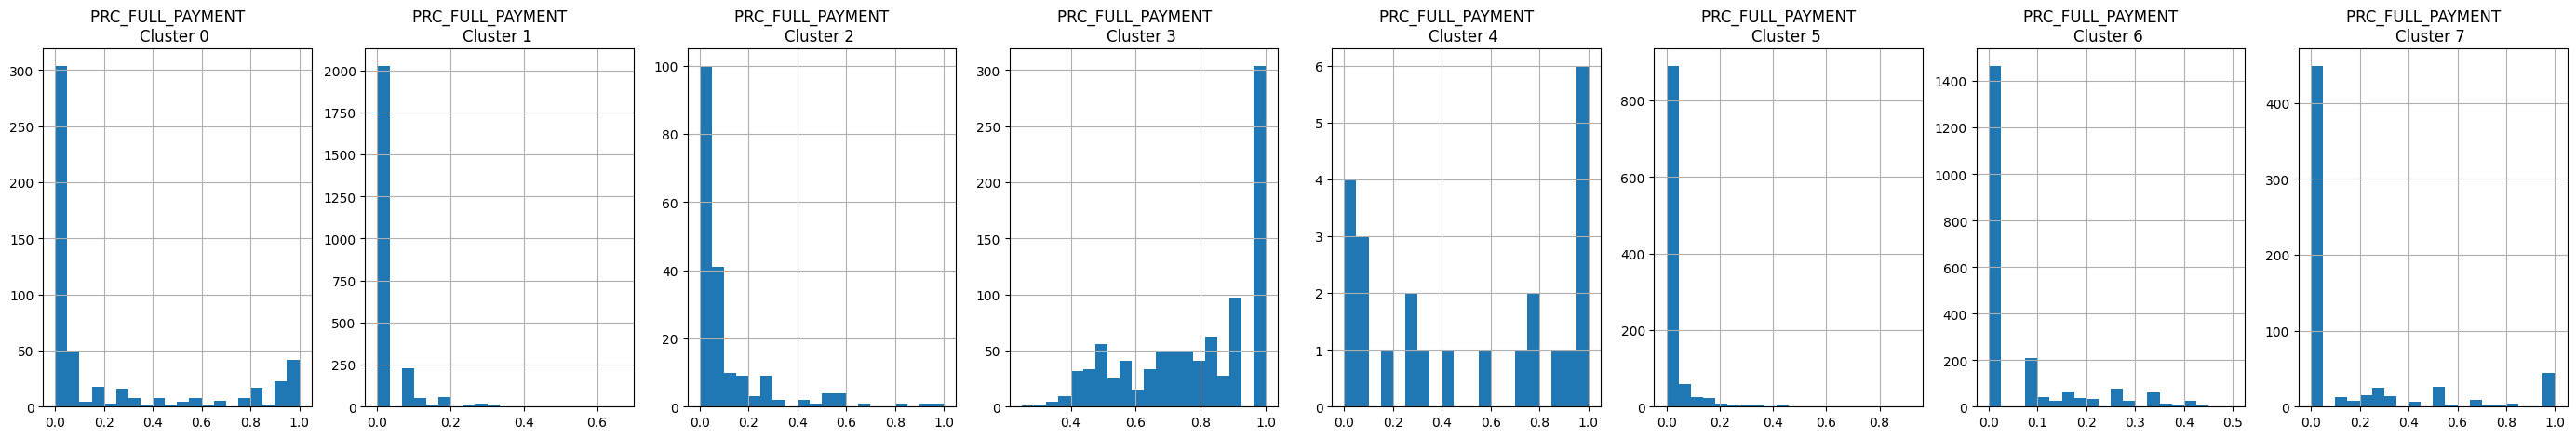

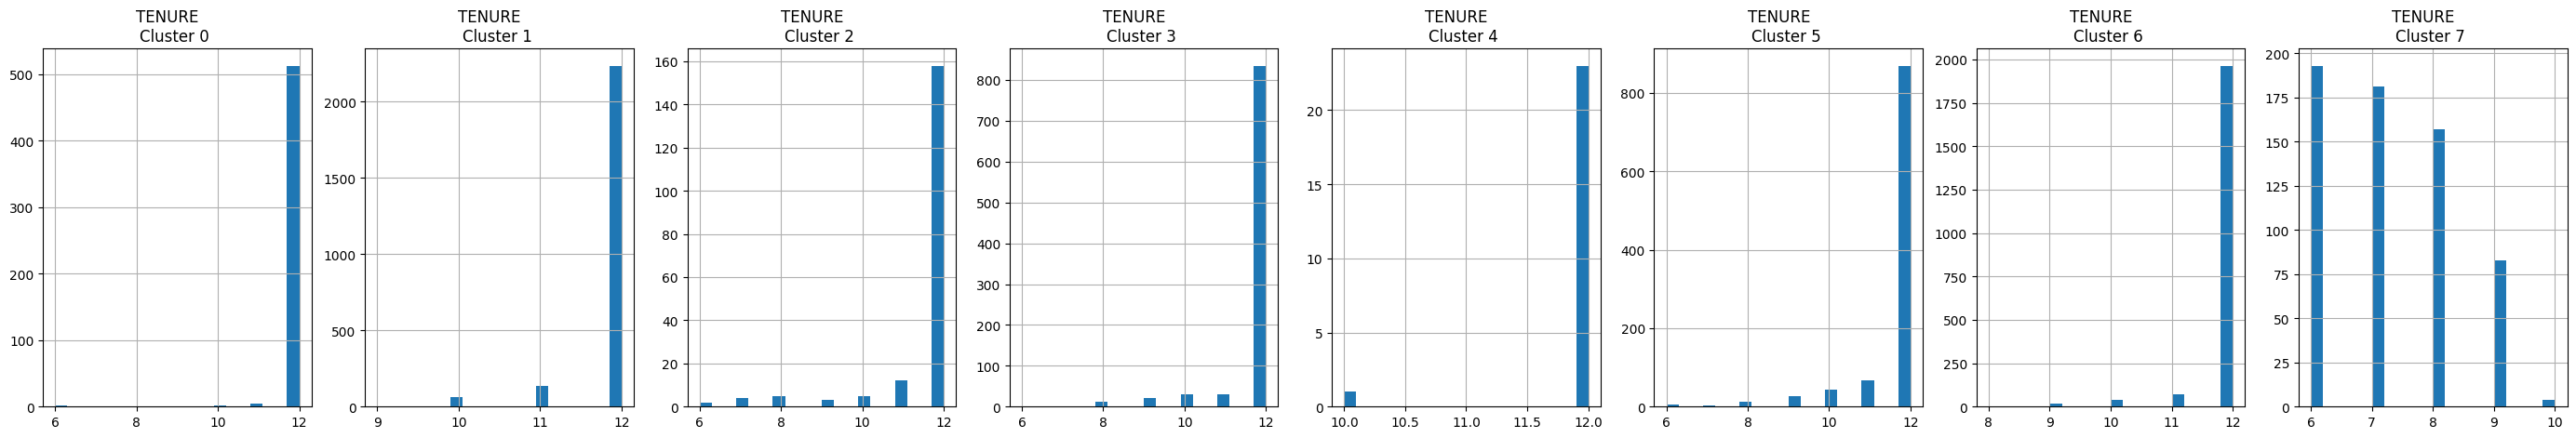

In [17]:
for i in df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))

  plt.show()


#PCA

In [18]:
# Obtain the principal components
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222026, -1.07645061],
       [-1.1382949 ,  2.50647666],
       [ 0.96968401, -0.3835203 ],
       ...,
       [-0.92620364, -1.8107856 ],
       [-2.33655167, -0.65796601],
       [-0.55642216, -0.40046712]])

In [19]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076451
1,-1.138295,2.506477
2,0.969684,-0.383520
3,-0.873628,0.043166
4,-1.599434,-0.688581


In [20]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076451,1
1,-1.138295,2.506477,5
2,0.969684,-0.383520,6
3,-0.873628,0.043166,1
4,-1.599434,-0.688581,1


/tmp/ipython-input-1127798869.py:2: UserWarning: 
The palette list has fewer values (8) than needed (9) and will cycle, which may produce an uninterpretable plot.
  ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])


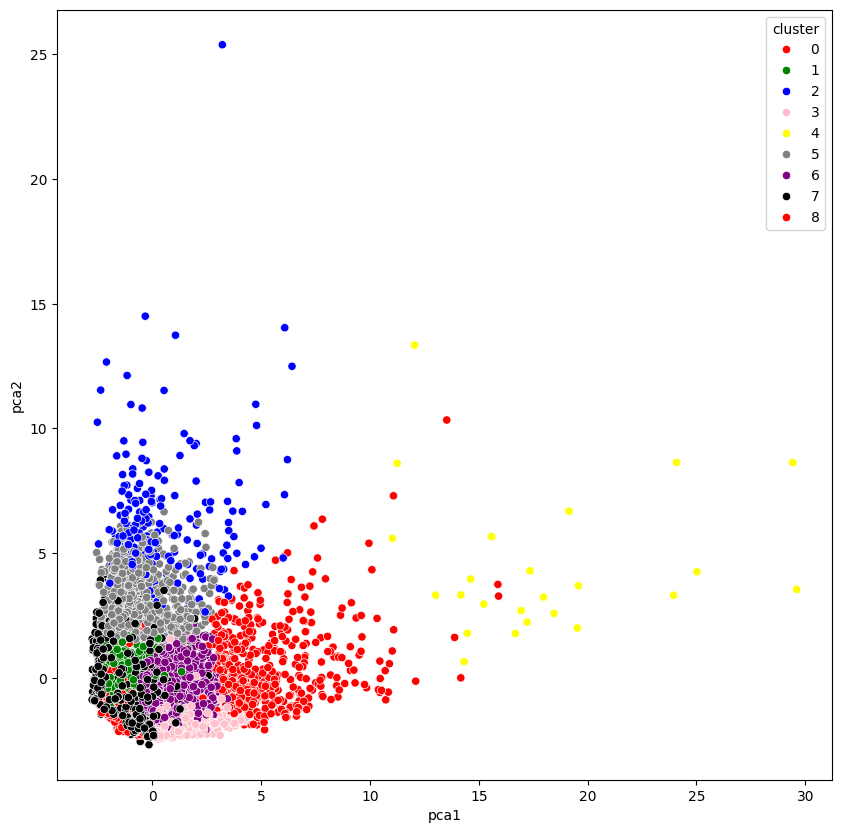

In [21]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

# Autoencoders

In [22]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')


In [23]:
creditcard_df_scaled.shape

(8950, 17)

In [24]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.6760
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 0.2733
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.2240
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 0.1721
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.1478
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - loss: 0.1411
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.1223
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - loss: 0.1140
Epoch 9/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 0.1200
Epoch 10/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.1059
Epoch 11/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0962
Epoch 12/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 0.0951
Epoch 13/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0827
Epoch 14/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 0.0823
Epoch 15/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0753
Ep

In [26]:
autoencoder.save_weights('autoencoder.weights.h5')

In [27]:
pred = encoder.predict(creditcard_df_scaled)

280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [28]:
pred.shape

(8950, 10)

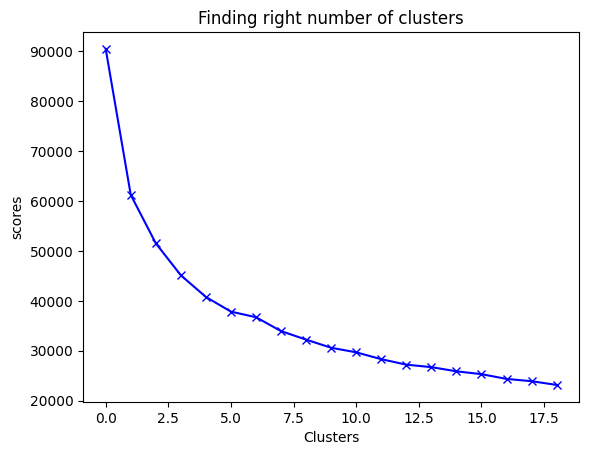

In [29]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores')
plt.show()

/tmp/ipython-input-3240673659.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(score_1, 'bx-', color = 'r')
/tmp/ipython-input-3240673659.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_2, 'bx-', color = 'g')


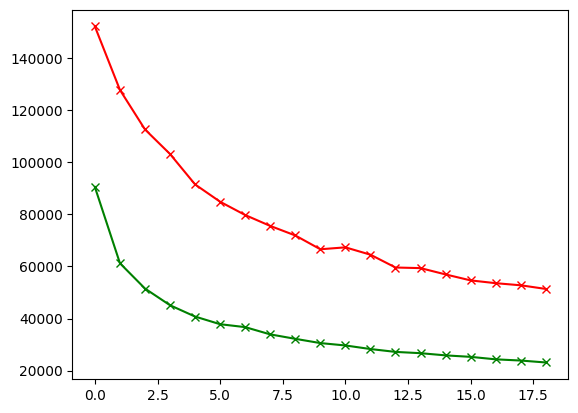

In [32]:
plt.plot(score_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

In [33]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

In [35]:
df_cluster_dr = pd.concat([creditcard_df_cluster, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1,1


In [36]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-2.070758,-0.309705
1,1.917262,-1.471714
2,0.439119,1.085379
3,-1.070967,-0.481749
4,-1.795181,-0.289471


In [37]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-2.070758,-0.309705,1
1,1.917262,-1.471714,0
2,0.439119,1.085379,3
3,-1.070967,-0.481749,1
4,-1.795181,-0.289471,1


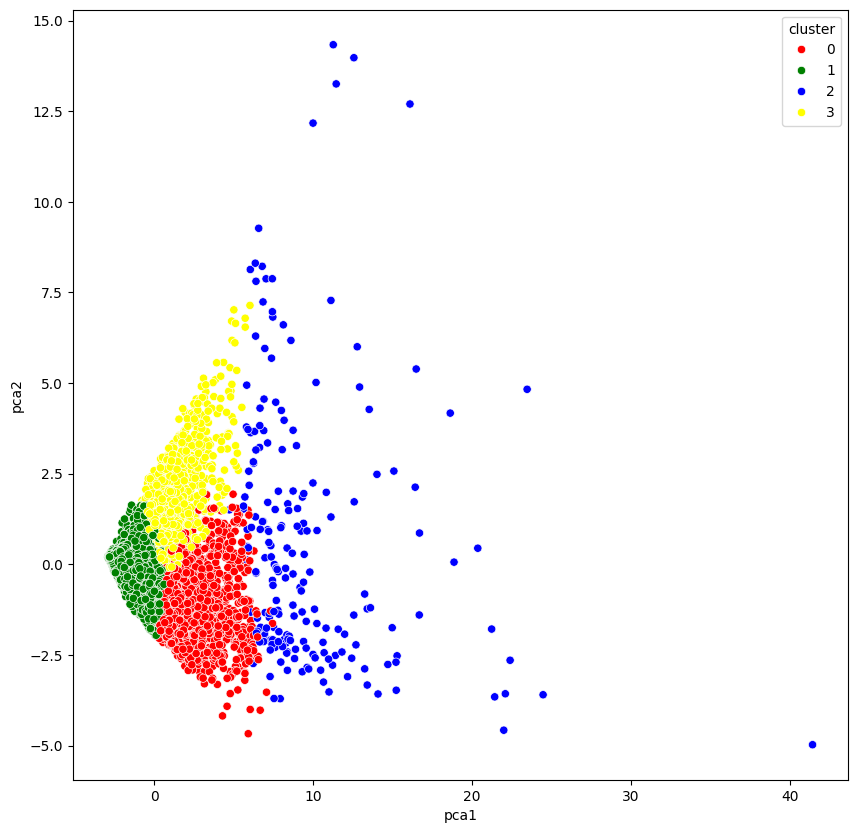

In [38]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()